In [8]:
using Distances, Plots, DataStructures, NearestNeighbors

In [2]:
#include("ClusteringFunctions.jl")

In [39]:
include("ToMaTo.jl")
using ToMaTo, Plots

In [2]:
#include("Clusterings.jl")

In [3]:
#using Clusterings, Plots

In [3]:
data2clust(rand(100,2),2,0.5,20,0.2)

1-element Array{Tuple{Int64,Array{Int64,1}},1}:
 (5, [5, 42, 56, 50, 36, 81, 57, 26, 44, 66  …  65, 52, 48, 43, 67, 25, 98, 37, 2, 91])

In [41]:
A=readdlm(".\\FCPS\\01FCPSdata\\TwoDiamonds.lrn");
A=float.(A[5:end,2:3]);

In [7]:
savefig(scatter(A[:,1],A[:,2],ms=4,aspect_ratio=:equal,markerstrokewidth=0.1,label=""),"TwoDiamonds_o")

In [45]:
@time S,u=ToMaTo.data2clust(A,2,0.5,20,0.2)

  0.071171 seconds (221.86 k allocations: 11.037 MiB)


(Array{Int64,1}[[732, 786, 708, 588, 706, 704, 418, 554, 713, 683  …  633, 434, 477, 489, 520, 466, 510, 411, 511, 521], [349, 277, 285, 196, 174, 363, 330, 272, 333, 40  …  169, 119, 116, 120, 121, 228, 111, 11, 5, 1]], [349, 349, 349, 786, 786, 349, 349, 349, 786, 349  …  349, 349, 349, 349, 349, 349, 786, 786, 786, 786])

In [48]:
points,plt1=ToMaTo.PlotClustering(A,S,4)

(2, Plot{Plots.GRBackend() n=2})

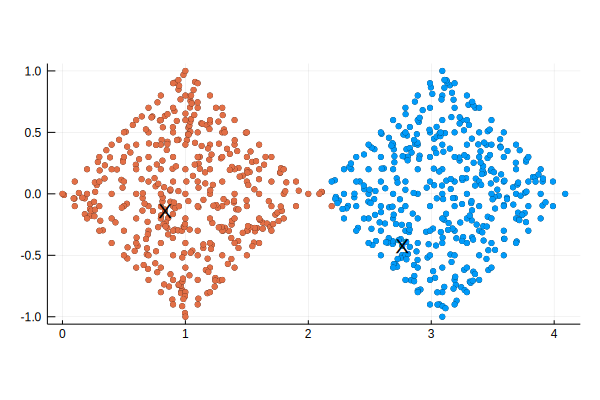

In [53]:
plt1

In [50]:
savefig(plt1,"TwoDiamonds")

In [2]:
#plot(plt1)

In [31]:
B=readdlm(".\\FCPS\\01FCPSdata\\Lsun.lrn");

In [32]:
B=float.(B[5:end,2:3]);
size(B)

(400, 2)

In [34]:
savefig(scatter(B[:,1],B[:,2],ms=2000/size(B,1),aspect_ratio=:equal,markerstrokewidth=0.1,label=""),"Lsun_o")

In [15]:
@time S=data2clust(B,1,5,5,0.4)

  0.042690 seconds (59.52 k allocations: 2.802 MiB, 30.45% gc time)


3-element Array{Tuple{Int64,Array{Int64,1}},1}:
 (313, [313, 320, 369, 375, 371, 374, 349, 353, 352, 385  …  337, 338, 301, 322, 324, 327, 354, 305, 345, 329])
 (167, [93, 131, 120, 154, 167, 141, 161, 65, 188, 185  …  34, 152, 108, 49, 198, 165, 102, 118, 78, 96])      
 (201, [201, 234, 250, 204, 207, 270, 288, 279, 219, 227  …  269, 265, 210, 261, 290, 228, 212, 240, 202, 280])

In [16]:
points,plt2=PlotClustering(B,S)

(400, Plot{Plots.GRBackend() n=3})

In [17]:
savefig(plt2,"Lsun") #data2clust(B,1,5,5,0.4)

In [4]:
#plot(plt2)

In [106]:
C=readdlm(".\\FCPS\\01FCPSdata\\Atom.lrn");

In [107]:
C=float.(C[5:end,2:4]);
size(C)

(800, 3)

In [139]:
savefig(scatter(C[:,1],C[:,2],C[:,3],ms=2000/size(C,1),aspect_ratio=:equal),"Atom_o")

In [130]:
S=data2clust(C,2,15,10,0.0000515)

2-element Array{Any,1}:
 (544, [544, 401, 688, 607, 455, 712, 789, 662, 797, 597  …  782, 624, 493, 464, 623, 749, 621, 664, 489, 479])
 (300, [300, 192, 133, 35, 118, 168, 40, 146, 127, 67  …  84, 48, 2, 269, 380, 285, 397, 1, 296, 18])          

In [141]:
points,plt3=PlotClustering(C,S)

(800, Plot{Plots.GRBackend() n=2})

In [142]:
savefig(plt3,"Atom")

In [12]:
#plot(plt3)

In [41]:
D=readdlm(".\\FCPS\\01FCPSdata\\Chainlink.lrn");

In [42]:
D=float.(D[5:end,2:4])
size(D)

(1000, 3)

In [53]:
pyplot()
savefig(scatter(D[:,1],D[:,2],D[:,3],ms=4,aspect_ratio=:equal,markerstrokewidth=0.1,label=""),"Chainlink_o")

In [54]:
@time S=data2clust(D,1,10,100,0.2)

  0.051864 seconds (144.66 k allocations: 8.320 MiB, 19.15% gc time)


2-element Array{Tuple{Int64,Array{Int64,1}},1}:
 (439, [439, 101, 292, 424, 375, 21, 447, 472, 24, 40  …  295, 271, 409, 435, 15, 104, 209, 39, 252, 122])     
 (939, [939, 601, 792, 924, 875, 521, 947, 972, 524, 540  …  795, 771, 909, 935, 515, 604, 709, 539, 752, 622])

In [55]:
points,plt4=ToMaTo.PlotClustering(D,S,4)

(1000, Plot{Plots.PyPlotBackend() n=2})

In [56]:
savefig(plt4,"Chainlink")

In [14]:
#plot(plt4) #S=data2clust(D,1,10,100,0.2)

In [30]:
#plotlyjs();
#plot(plt4)

In [31]:
gr();

In [20]:
E=readdlm(".\\FCPS\\01FCPSdata\\EngyTime.lrn");

In [21]:
E=float.(E[5:end,2:3]);
size(E)

(4096, 2)

In [36]:
savefig(scatter(E[:,1],E[:,2],ms=2.7,aspect_ratio=:equal,markerstrokewidth=0.1,markerstrokewidth=0.1,label=""),"EngyTime_o")

In [29]:
@time S=data2clust(E,2,1,10,0.00000001)

  0.714078 seconds (4.77 M allocations: 185.837 MiB, 21.25% gc time)


2-element Array{Tuple{Int64,Array{Int64,1}},1}:
 (3336, [3336, 2381, 3676, 2557, 2222, 2088, 2831, 3062, 3371, 3955  …  2496, 2767, 2409, 2589, 3612, 3864, 2428, 2493, 2604, 3552])
 (2002, [2002, 322, 1688, 1000, 1631, 813, 1289, 1516, 1171, 39  …  1641, 565, 555, 432, 1827, 1594, 1169, 753, 1144, 765])         

In [25]:
points,plt6=ToMaTo.PlotClustering(E,S,2.7)

(4096, Plot{Plots.GRBackend() n=2})

In [27]:
savefig(plt6,"EngyTime") #S=data2clust(E,2,1,10,0.00000001)

In [280]:
gr()

Plots.GRBackend()

In [59]:
rand(100000,3)

100000×3 Array{Float64,2}:
 0.032081   0.963046   0.68037   
 0.0729967  0.657394   0.975875  
 0.920964   0.137839   0.834032  
 0.899759   0.875178   0.250144  
 0.12087    0.176314   0.380163  
 0.773989   0.5562     0.486983  
 0.0971986  0.193661   0.383068  
 0.0133231  0.130388   0.706445  
 0.716259   0.959352   0.421259  
 0.478397   0.82292    0.169642  
 0.406651   0.791774   0.288451  
 0.409789   0.560718   0.625756  
 0.562123   0.150121   0.184906  
 ⋮                               
 0.817773   0.545238   0.833441  
 0.205196   0.46364    0.357788  
 0.597125   0.275509   0.049801  
 0.139461   0.377031   0.926675  
 0.906008   0.779262   0.134456  
 0.373505   0.101724   0.590294  
 0.495943   0.724144   0.649659  
 0.4447     0.311256   0.692534  
 0.849251   0.0172903  0.448943  
 0.753821   0.151604   0.161014  
 0.61282    0.6647     0.266466  
 0.473273   0.598808   0.00337002

In [62]:
@time sortrows(rand(100000,3),rev=true,by=x->x[1])

  0.129000 seconds (116.77 k allocations: 11.593 MiB, 9.13% gc time)


100000×3 Array{Float64,2}:
 0.999998     0.691376   0.00537691
 0.999987     0.109579   0.0245126 
 0.99994      0.491517   0.264293  
 0.999936     0.482469   0.884601  
 0.999933     0.362211   0.221373  
 0.999929     0.437634   0.87996   
 0.999905     0.564699   0.57817   
 0.999891     0.922577   0.0441529 
 0.999882     0.0263711  0.652024  
 0.999877     0.427161   0.488891  
 0.999851     0.456602   0.283361  
 0.999844     0.87051    0.46581   
 0.999844     0.614993   0.182125  
 ⋮                                 
 0.000130484  0.976565   0.621283  
 0.000119127  0.181208   0.425971  
 0.000118508  0.777861   0.222398  
 0.000116399  0.8161     0.28565   
 0.000104649  0.801688   0.545432  
 8.00165e-5   0.8587     0.146836  
 7.60255e-5   0.932585   0.814156  
 7.59231e-5   0.322592   0.0614921 
 5.03012e-5   0.697662   0.500542  
 1.98188e-5   0.482714   0.927033  
 1.6584e-5    0.329099   0.752889  
 8.84921e-6   0.840433   0.734339  